# import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Setup Environment

In [9]:
img_size= (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 32
epochs = 30

# Load Image data

In [11]:
data = tf.keras.utils.image_dataset_from_directory(directory="dataset",
                                                  labels='inferred',
                                                  label_mode='int',
                                                  class_names=None ,
                                                  color_mode='rgb',
                                                  image_size=img_size,
                                                  seed=seed)

Found 13319 files belonging to 10 classes.


In [12]:
# print class names

class_names = data.class_names
class_names

['Bacterial Blight',
 'Blast',
 'Brown Spot',
 'Healthy Rice',
 'Leaf Blast',
 'Leaf Scald',
 'Narrow Brown Leaf Spot',
 'Rice Hispa',
 'Sheath Blight',
 'Tungro']

# visualise Images

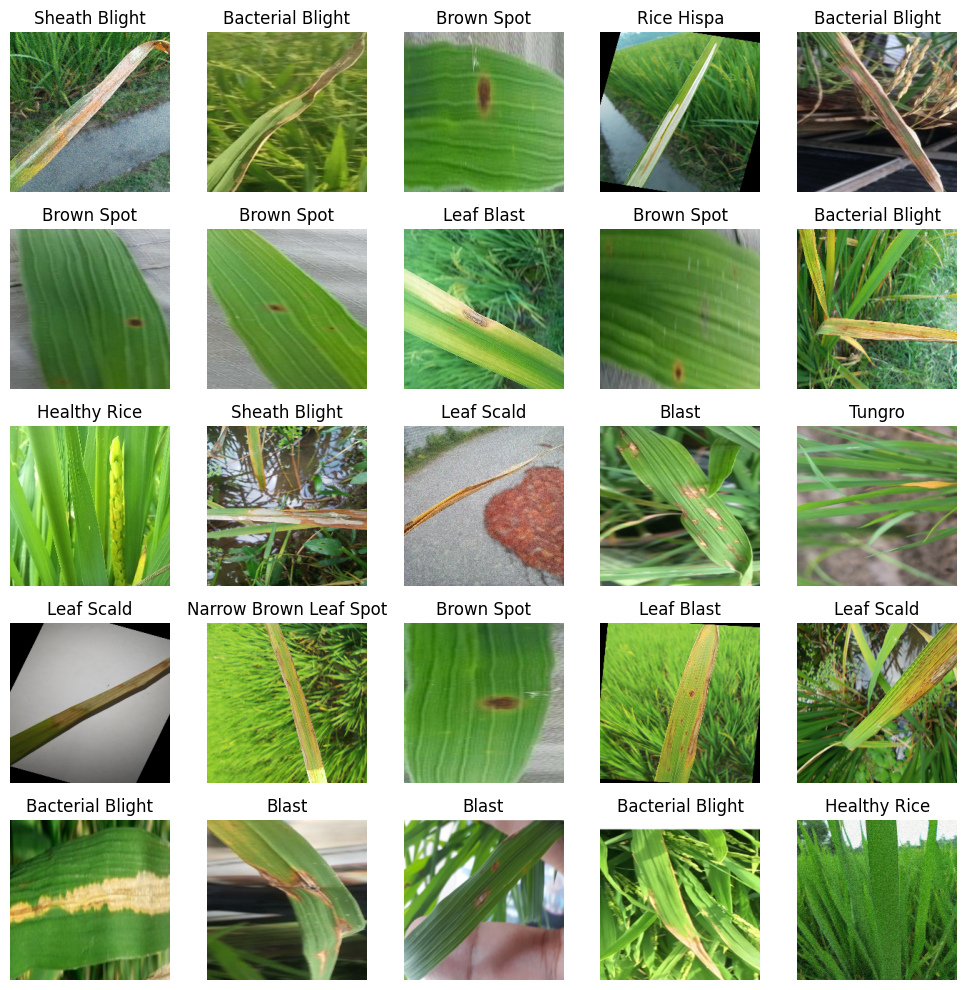

In [13]:
plt.figure(figsize=(10,10))
for images , labels in data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

# Data Preprocessing

In [13]:
# Create Dependent(y) and Independent(X) variable

X = []
y = []

for images , labels in data:
    X.append(images.numpy())
    y.append(labels.numpy())


# convert X , y list into numpy array

X = np.concatenate(X ,axis=0)
y = np.concatenate(y ,axis=0)

In [47]:
X

array([[[[0.3775598 , 0.48344213, 0.11873624],
         [0.42498812, 0.5308705 , 0.16285014],
         [0.40266514, 0.5085475 , 0.13620041],
         ...,
         [0.13780943, 0.24428704, 0.03233898],
         [0.13533995, 0.24514386, 0.01736618],
         [0.17113267, 0.2809366 , 0.04901165]],

        [[0.41241777, 0.5166429 , 0.15525147],
         [0.43438283, 0.5402652 , 0.17555928],
         [0.41037634, 0.5162587 , 0.14490014],
         ...,
         [0.15336919, 0.26153967, 0.03868608],
         [0.21687499, 0.3266789 , 0.09432619],
         [0.28875995, 0.4002211 , 0.15668719]],

        [[0.44332704, 0.5453888 , 0.18832408],
         [0.43546763, 0.53802365, 0.17997043],
         [0.4081786 , 0.513556  , 0.14885016],
         ...,
         [0.25800955, 0.36781347, 0.13593596],
         [0.32972965, 0.44116712, 0.1976567 ],
         [0.40739182, 0.5210163 , 0.2648148 ]],

        ...,

        [[0.4805343 , 0.4460064 , 0.13926746],
         [0.3420619 , 0.31267452, 0.02571354]

# Normalise Data

In [15]:
# normalise / reshape image size in the range of [0,1] , for that devide each pixels by 255.

X = X.astype('float32')/255

In [49]:
# Split data into train and test / validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
X_train.shape , X_test.shape

((9323, 224, 224, 3), (3996, 224, 224, 3))

# One Hot Encoding

In [52]:
# Convert labels to one-hot encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [53]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9323, 224, 224, 3) (9323, 10)
(3996, 224, 224, 3) (3996, 10)


# Create Model

In [55]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten ,Dense ,Dropout

In [56]:
# Define Model

model = Sequential()
model.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False ,input_shape=input_shape_3D))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=128 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256 , kernel_size=3 ,padding='same' ,strides=1 ,activation='relu' ,use_bias=False))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(250,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 224, 224, 16)      432       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 74, 74, 32)        4608      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 64)        18432     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 8, 8, 64)         

# Train Model

In [60]:
# Define the model with optimizer , loss , metrics
model.compile(optimizer='Adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [58]:
# we are assigning the checkpointer for save the model with val_accuracy
from keras.callbacks import ModelCheckpoint
check_pointer = ModelCheckpoint(filepath='model.weights.best.hdf5' ,
                                save_best_only=False ,
                                mode='auto' ,
                                monitor='val_accuracy' )

In [59]:
# Train the model

history = model.fit(X_train,y_train,batch_size=32 ,epochs=63 ,validation_data=(X_test,y_test) ,callbacks=[check_pointer] ,verbose=1 ,shuffle=True)

Epoch 1/63
292/292 [==============================] - 41s 138ms/step - loss: 1.9201 - accuracy: 0.2867 - val_loss: 1.5781 - val_accuracy: 0.4107
Epoch 2/63
  1/292 [..............................] - ETA: 34s - loss: 1.7841 - accuracy: 0.3750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


292/292 [==============================] - 37s 127ms/step - loss: 1.4370 - accuracy: 0.4659 - val_loss: 1.2172 - val_accuracy: 0.5698
Epoch 3/63
292/292 [==============================] - 37s 127ms/step - loss: 1.1051 - accuracy: 0.5937 - val_loss: 0.9150 - val_accuracy: 0.6904
Epoch 4/63
292/292 [==============================] - 37s 127ms/step - loss: 0.8560 - accuracy: 0.6866 - val_loss: 0.6835 - val_accuracy: 0.7515
Epoch 5/63
292/292 [==============================] - 37s 127ms/step - loss: 0.6860 - accuracy: 0.7575 - val_loss: 0.6138 - val_accuracy: 0.7945
Epoch 6/63
292/292 [==============================] - 37s 127ms/step - loss: 0.5987 - accuracy: 0.7901 - val_loss: 0.5292 - val_accuracy: 0.8166
Epoch 7/63
292/292 [==============================] - 37s 126ms/step - loss: 0.5089 - accuracy: 0.8188 - val_loss: 0.4992 - val_accuracy: 0.8306
Epoch 8/63
292/292 [==============================] - 37s 126ms/step - loss: 0.4337 - accuracy: 0.8491 - val_loss: 0.5236 - val_accuracy: 0.8

# Predict the Model

In [61]:
# make prediction for X_test

y_prediction = model.predict(X_test)

leaf_class = ['Bacterial Blight',
 'Blast',
 'Brown Spot',
 'Healthy Rice',
 'Leaf Blast',
 'Leaf Scald',
 'Narrow Brown Leaf Spot',
 'Rice Hispa',
 'Sheath Blight',
 'Tungro']


125/125 [==============================] - 4s 31ms/step


In [78]:
class_indices = {i: leaf_class[i] for i in range(len(leaf_class))}

In [79]:
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)

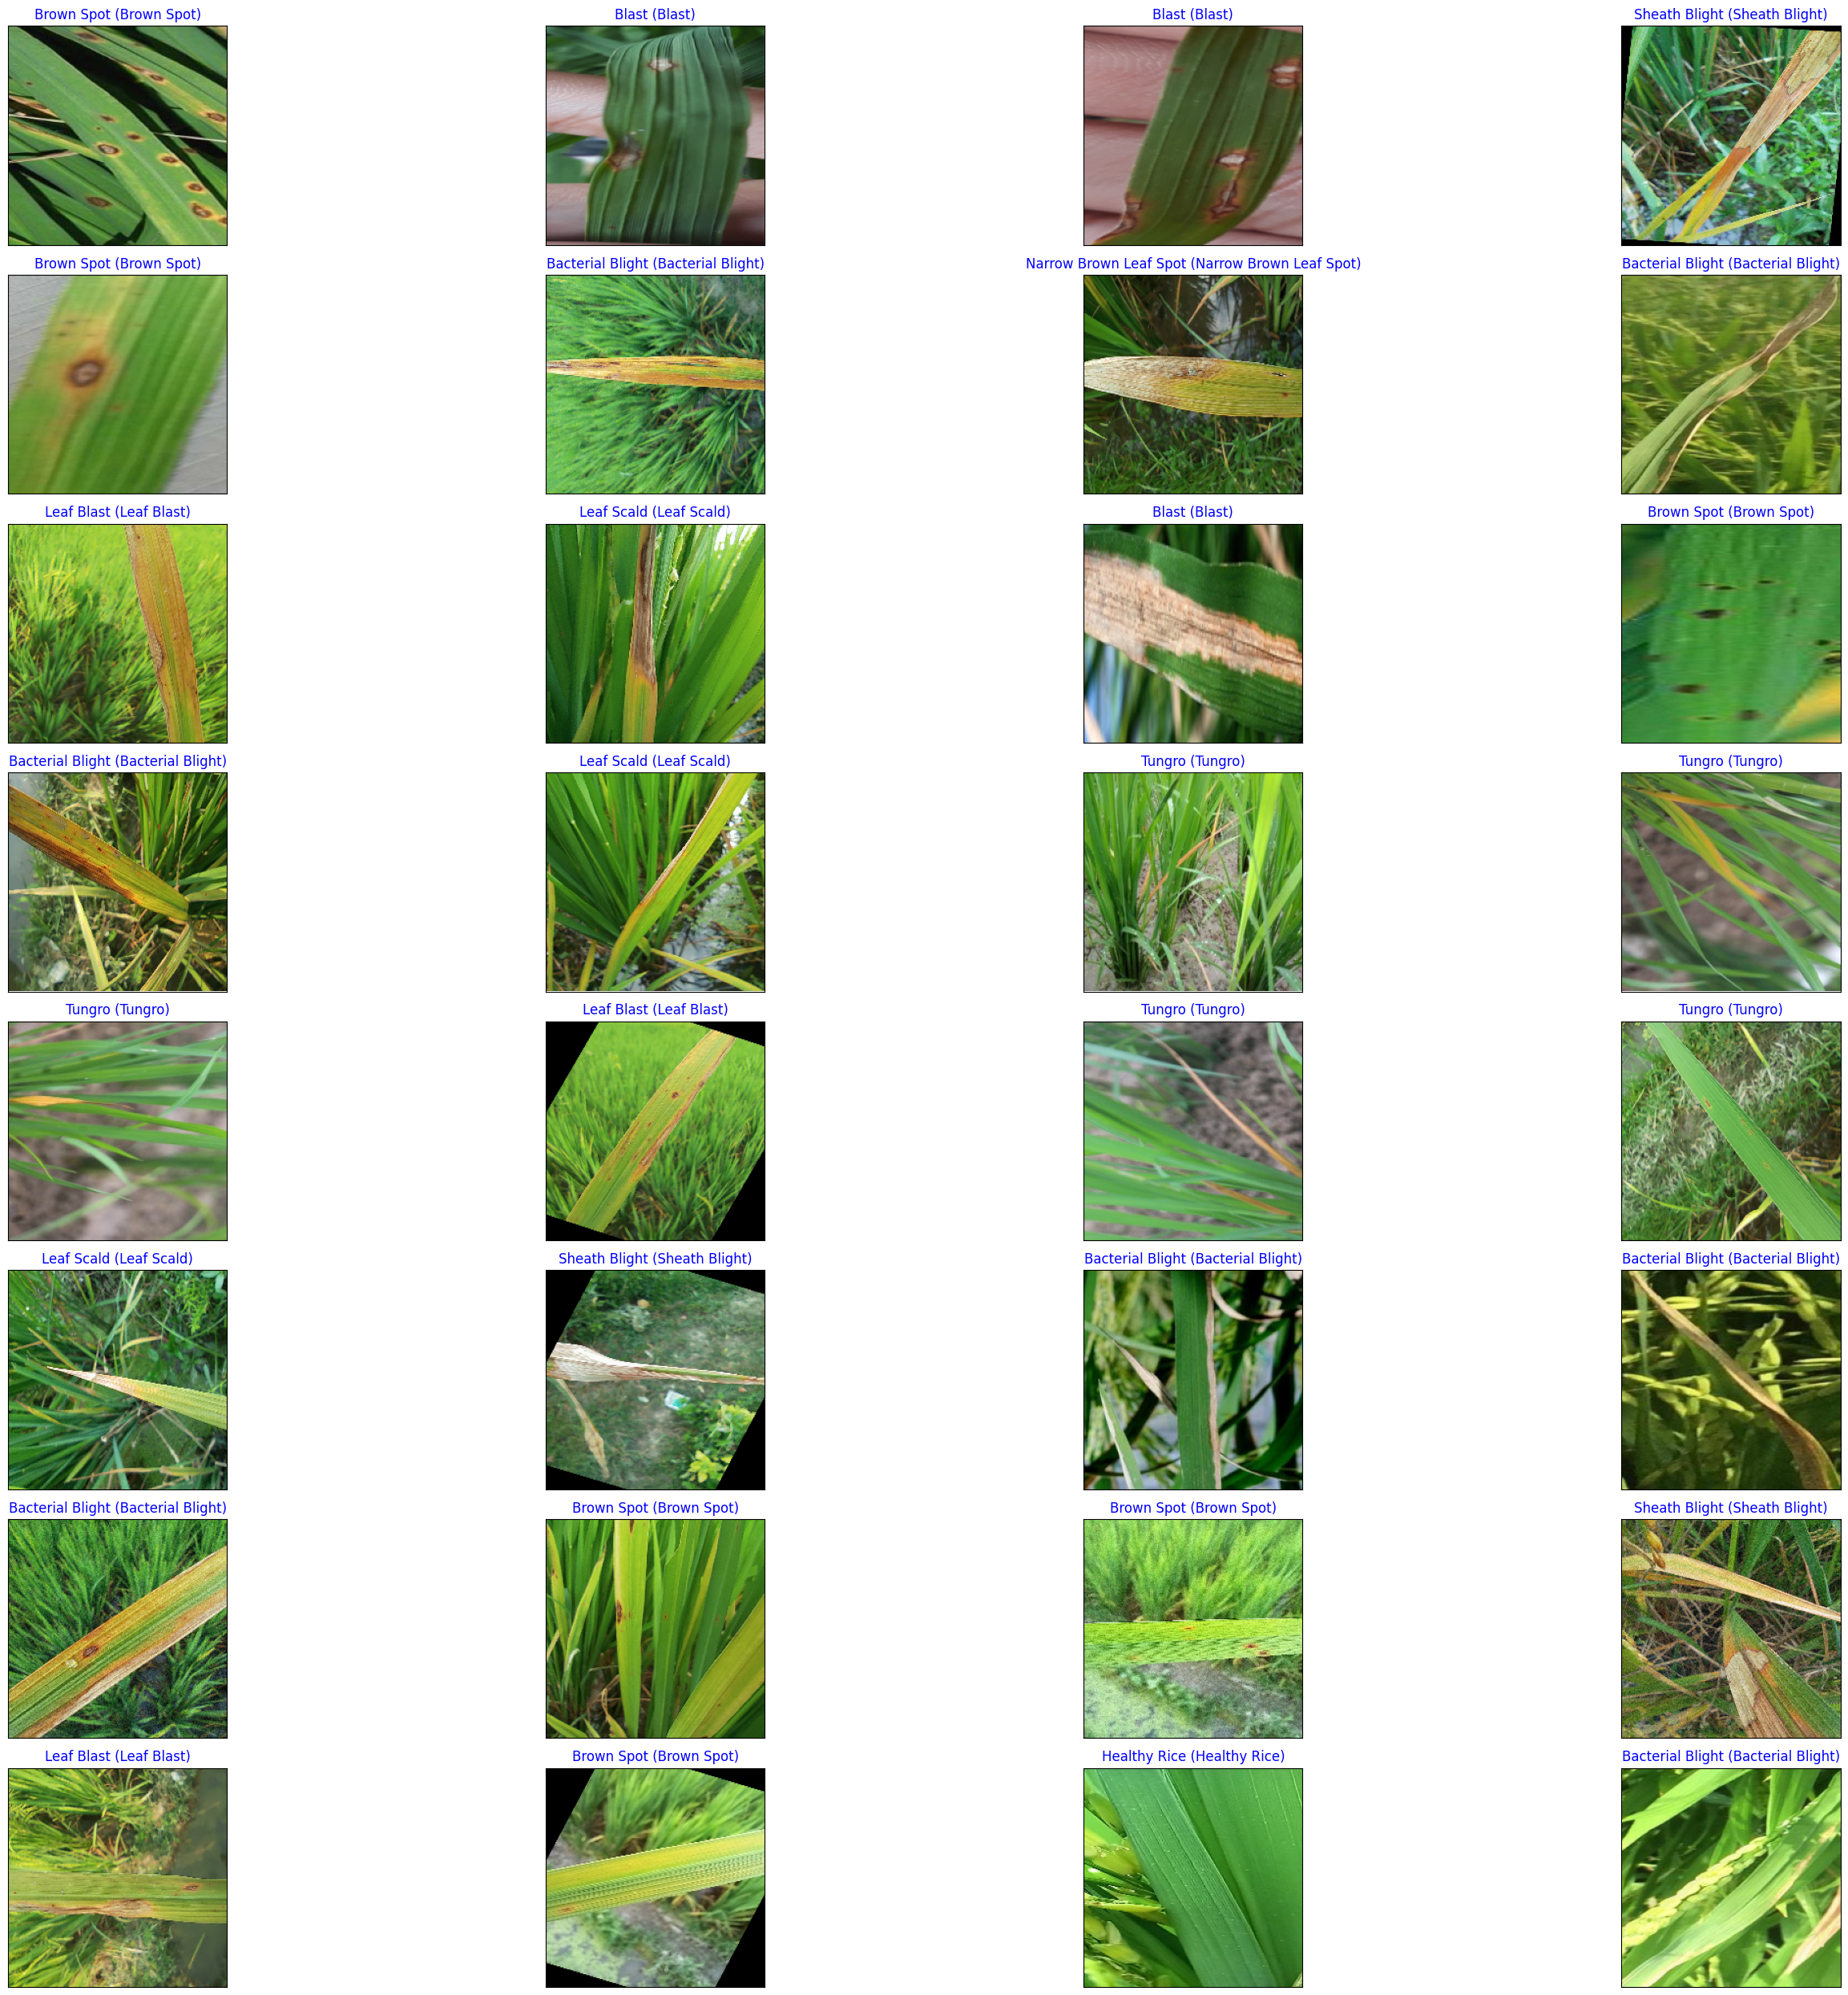

In [63]:
# Assuming you have 'y_hat' for predictions and 'y_test' for ground truth
# Assuming 'leaf_class' is a list of class labels

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(30, 25))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=True)):
    ax = fig.add_subplot(8, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))

    # Assuming 'y_hat' contains the model predictions
    pred_idx = np.argmax(y_prediction[idx])

    true_idx = np.argmax(y_prediction[idx])

    ax.set_title("{} ({})".format(leaf_class[pred_idx], leaf_class[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

plt.tight_layout()


# Evaluate Model's Performance

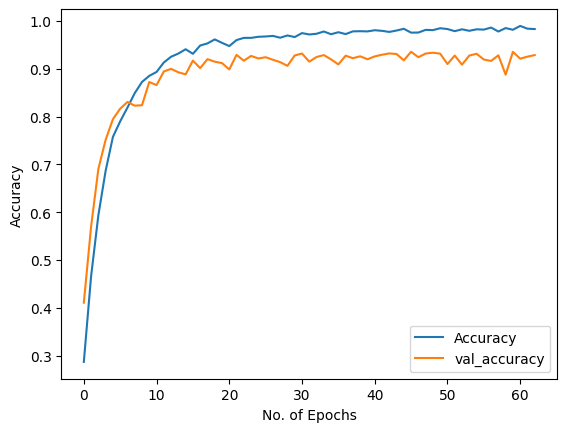

In [64]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

In [65]:
# print Accuracy

test_Accuracy = model.evaluate(X_test,y_test)
print(f"Model's Accuracy : {test_Accuracy[1]*100}")

125/125 [==============================] - 4s 32ms/step - loss: 0.3392 - accuracy: 0.9287
Model's Accuracy : 92.86786913871765


In [72]:
predicted_classes_list = predicted_classes.tolist()
json.dump(predicted_classes_list, open('class_indices.json', 'w'))

In [66]:
model.save("rice_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
